Importing libraries

In [13]:
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.utils import class_weight

# Read data and split into train-val

In [2]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
X_train, X_val, y_train, y_val = model_selection.train_test_split(train_df.iloc[:, 0:-2], train_df.iloc[:, -1:], test_size=0.1, random_state = 0)
X_test, y_test = test_df.iloc[:, 0:-2], test_df.iloc[:, -1:]

print(f'Original training data shape: {train_df.shape}, Original Testing data shape: {test_df.shape}')
print(f'Shape of training data after splitting into training-validation ---> training data x: {X_train.shape}, training data y: {y_train.shape}, validation data x: {X_val.shape}, validation data y: {y_test.shape}'
)
print(f'Testing data shape -> test x: {X_test.shape}, test y: {y_test.shape}')

Original training data shape: (7352, 563), Original Testing data shape: (2947, 563)
Shape of training data after splitting into training-validation ---> training data x: (6616, 561), training data y: (6616, 1), validation data x: (736, 561), validation data y: (2947, 1)
Testing data shape -> test x: (2947, 561), test y: (2947, 1)


## Linear SVC (Support Vector Classifier) - default

multiclass -> OVR (auto), Regularization: L2, C = 1

Linear SVM - Default parameters - Validation set score: 0.9850543478260869, Test set score: 0.9670851713607058
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.88      0.92       491
          STANDING       0.91      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.97      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



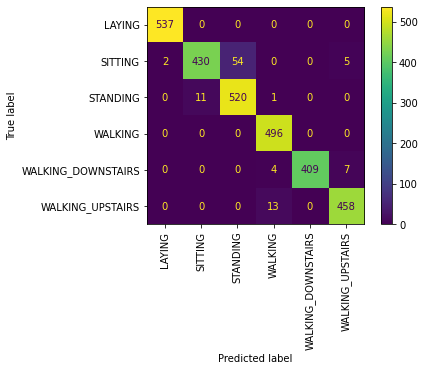

In [3]:
svc = svm.LinearSVC(random_state=0, max_iter=1000000)
svc.fit(X_train, y_train.values.ravel())
val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val))
test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(f'Linear SVM - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')

## Linear SVM - experiment with parameters


In [6]:
# default parameters

parameters_set = [
    {'C' : .1, 'penalty' : 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e6},
    {'C' : .25, 'penalty' : 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e6},
    {'C' : .5, 'penalty' : 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e6},
    {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e6},
    {'C' : 3, 'penalty' : 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e6},
    #{'C' : 100, 'penalty' : 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'},
    
    {'C' : .1, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : .25, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : .5, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 3, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 100, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    
    
     {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'max_iter':1e9}
]

best_performace_score = 0
best_performance_params = None
best_performance_model = None

for params in parameters_set:
    dual=True
    if params['penalty'] == 'l1':
        dual=False
    svc = svm.LinearSVC(max_iter=1000000, random_state=0, 
                                      C=params['C'], penalty = params['penalty'], 
                                      multi_class = params['multi_class'], loss=params['loss'], dual=dual)
    svc.fit(X_train, y_train.values.ravel())
    score = svc.score(X_val, y_val)
    if score > best_performace_score:
        best_performace_score = score
        best_performance_params = params
    print(f'Linear SVC - params: {params}, Validation set score: {score}')

print(f'Best performing parameters using accuracy: {best_performance_params}')
"""
Running the model on best-accuracy parameters
"""
dual=True
if best_performance_params['penalty'] == 'l1':
    dual=False
svc = svm.LinearSVC(max_iter=1000000, random_state=0, 
                                      C=params['C'], penalty = best_performance_params['penalty'], 
                                      multi_class = best_performance_params['multi_class'], loss=best_performance_params['loss'], dual=dual)
svc.fit(X_train, y_train.values.ravel())
val_score = svc.score(X_val, y_val)
test_score = svc.score(X_test, y_test)
print(f'Logisitic Regression - Best parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')

Linear SVC - params: {'C': 0.1, 'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9864130434782609
Linear SVC - params: {'C': 0.25, 'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9864130434782609
Linear SVC - params: {'C': 0.5, 'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9864130434782609
Linear SVC - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9850543478260869
Linear SVC - params: {'C': 3, 'penalty': 'l2', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9823369565217391
Linear SVC - params: {'C': 0.1, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9850543478260869
Linear SVC - params: {'C': 0.25, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge'}, Validation set score: 0.9864130434782609
Linear SVC - params: {'C': 0.5, 'p

/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge'}, Validation set score: 0.9850543478260869


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC - params: {'C': 1.0, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge'}, Validation set score: 0.9850543478260869


KeyboardInterrupt: 

Linear SVC - params: {'C': 0.1, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9850543478260869
Linear SVC - params: {'C': 0.25, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9864130434782609
Linear SVC - params: {'C': 0.5, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9877717391304348
Linear SVC - params: {'C': 1.0, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9850543478260869
Linear SVC - params: {'C': 3, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9809782608695652


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9850543478260869


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC - params: {'C': 1.0, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9850543478260869


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC - params: {'C': 1.0, 'penalty': 'l2', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9850543478260869


/home/parul/installations/anaconda3/envs/mlprojectenv/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Linear SVC - params: {'C': 1.0, 'penalty': 'l1', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'max_iter': 1000000000.0}, Validation set score: 0.9850543478260869
Best performing parameters using accuracy: {'C': 0.5, 'penalty': 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter': 1000000000.0}
Logisitic Regression - Best parameters - Validation set score: 0.9850543478260869, Test set score: 0.9674244994910078
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.97      1.00      0.99       496
WALKING_DOWNSTAIRS       1.00      0.99      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.98       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97

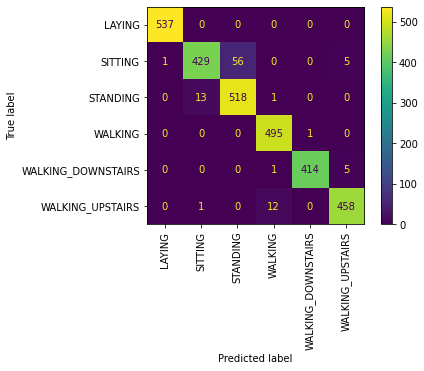

In [8]:
# default parameters

parameters_set = [
    
    {'C' : .1, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : .25, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : .5, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 3, 'penalty' : 'l1', 'multi_class': 'ovr', 'loss': 'squared_hinge', 'max_iter':1e9},
    
    
     {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'crammer_singer', 'loss': 'squared_hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l2', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'max_iter':1e9},
    {'C' : 1.0, 'penalty' : 'l1', 'multi_class': 'crammer_singer', 'loss': 'hinge', 'max_iter':1e9}
]

best_performace_score = 0
best_performance_params = None
best_performance_model = None

for params in parameters_set:
    dual=True
    if params['penalty'] == 'l1':
        dual=False
    svc = svm.LinearSVC(max_iter=params['max_iter'], random_state=0, 
                                      C=params['C'], penalty = params['penalty'], 
                                      multi_class = params['multi_class'], loss=params['loss'], dual=dual)
    svc.fit(X_train, y_train.values.ravel())
    score = svc.score(X_val, y_val)
    if score > best_performace_score:
        best_performace_score = score
        best_performance_params = params
    print(f'Linear SVC - params: {params}, Validation set score: {score}')

print(f'Best performing parameters using accuracy: {best_performance_params}')
"""
Running the model on best-accuracy parameters
"""
dual=True
if best_performance_params['penalty'] == 'l1':
    dual=False
svc = svm.LinearSVC(max_iter=1e9, random_state=0, 
                                      C=params['C'], penalty = best_performance_params['penalty'], 
                                      multi_class = best_performance_params['multi_class'], loss=best_performance_params['loss'], dual=dual)
svc.fit(X_train, y_train.values.ravel())
val_score = svc.score(X_val, y_val)
test_score = svc.score(X_test, y_test)
print(f'Logisitic Regression - Best parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')

## PCA followed by Linear SVM

Results - no improvement, but we can get similar results using lesser features

Number of dimensions for variance 0.5 = 1
Linear SVM - Default parameters - Validation set score: 0.40217391304347827, Test set score: 0.4221241940956905
Number of dimensions for variance 0.6 = 1
Linear SVM - Default parameters - Validation set score: 0.40217391304347827, Test set score: 0.4221241940956905
Number of dimensions for variance 0.7 = 3
Linear SVM - Default parameters - Validation set score: 0.7472826086956522, Test set score: 0.7736681370885646
Number of dimensions for variance 0.8 = 10
Linear SVM - Default parameters - Validation set score: 0.8777173913043478, Test set score: 0.8652867322701052
Number of dimensions for variance 0.9 = 34
Linear SVM - Default parameters - Validation set score: 0.9429347826086957, Test set score: 0.9117746861214795
Number of dimensions for variance 0.95 = 67
Linear SVM - Default parameters - Validation set score: 0.9619565217391305, Test set score: 0.9433322022395657
Number of dimensions for variance 0.99 = 155
Linear SVM - Default parameters

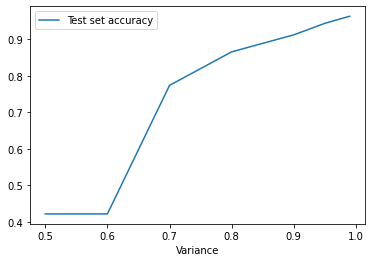

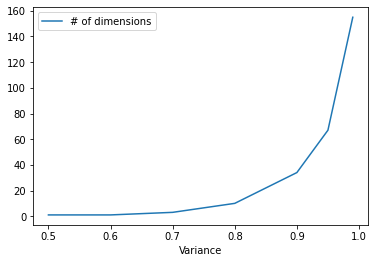

In [12]:
variances = [.5, .6, .7, .8, .9, .95, .99]
components = []
accuracies = []


for desired_variance in variances:
    pca = PCA(n_components=desired_variance)
    pca = pca.fit(X_train)
    X_train_pca, X_val_pca, X_test_pca = pca.transform(X_train), pca.transform(X_val), pca.transform(X_test)
    print(f'Number of dimensions for variance {desired_variance} = {len(pca.explained_variance_ratio_)}')
    
    svc = svm.LinearSVC(random_state=0, max_iter=1e9)
    svc.fit(X_train_pca, y_train.values.ravel())
    val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val_pca))
    test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test_pca))

    print(f'Linear SVM - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
    components.append(len(pca.explained_variance_ratio_))
    accuracies.append(test_score)
    
pca_performance_df = pd.DataFrame(
     {
         'Variance': variances,
         '# of dimensions': components,
         'Test set accuracy': accuracies
     }
)
pca_performance_df.plot(x ='Variance', y='Test set accuracy', kind = 'line')
plt.show()

pca_performance_df.plot(x ='Variance', y='# of dimensions', kind = 'line')
plt.show()

## Adding weights to classes for linear SVM

Since SITTING class is being misclassified a lot into STANDING, let's try assigning more weight to the SITTING class

Class weighting: [1. 4. 3. 1. 1. 1.] for ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']
Linear SVM - Default parameters - Validation set score: 0.9850543478260869, Test set score: 0.9657278588394977
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.87      0.92       491
          STANDING       0.90      0.97      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.97      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947

Class weighting: [0.86824147 0.96302766 0.89212513 0.99698614 1.2334079  1.14265976] for ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_U

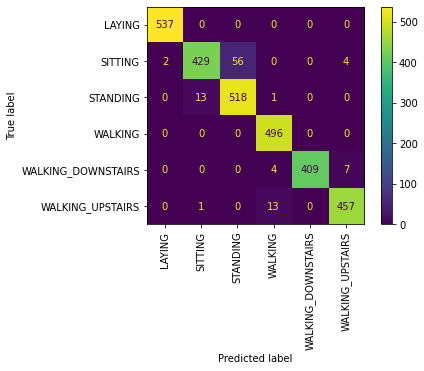

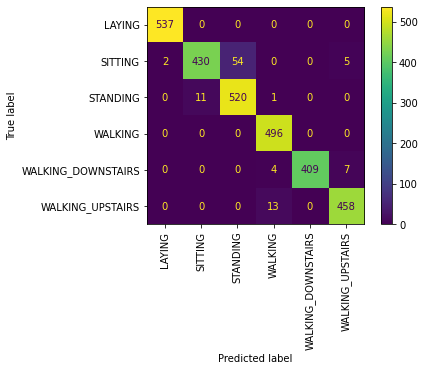

In [16]:
# default parameters
svc = svm.LinearSVC(max_iter=1e9, random_state=0, class_weight={'SITTING': 4, 'STANDING': 3})
classess = np.unique(y_train.values.ravel())
weighting = class_weight.compute_class_weight({'SITTING': 4, 'STANDING': 3}, y= y_train.values.ravel(), classes=classess)
print(f'Class weighting: {weighting} for {classess}')
svc.fit(X_train, y_train.values.ravel())
val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val))
test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(f'Linear SVM - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')


"""
Balanced class_weight  - according to number of occurences
"""

# default parameters
svc = svm.LinearSVC(max_iter=1e9, random_state=0, class_weight='balanced')
classess = np.unique(y_train.values.ravel())
weighting = class_weight.compute_class_weight('balanced', y= y_train.values.ravel(), classes=classess)
print(f'Class weighting: {weighting} for {classess}')
svc.fit(X_train, y_train.values.ravel())
val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val))
test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(f'Linear SVM - Default parameters - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')

# SVM - Kernels other than Linear

SVM - Default parameters (Radial Basis Kernel) - Validation set score: 0.9741847826086957, Test set score: 0.9480827960637936
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.94      0.88      0.91       491
          STANDING       0.90      0.94      0.92       532
           WALKING       0.94      0.99      0.96       496
WALKING_DOWNSTAIRS       0.99      0.91      0.95       420
  WALKING_UPSTAIRS       0.93      0.96      0.94       471

          accuracy                           0.95      2947
         macro avg       0.95      0.95      0.95      2947
      weighted avg       0.95      0.95      0.95      2947

SVM - Sigmoid Kernel - Validation set score: 0.8695652173913043, Test set score: 0.843909060061079
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.38      0.55  

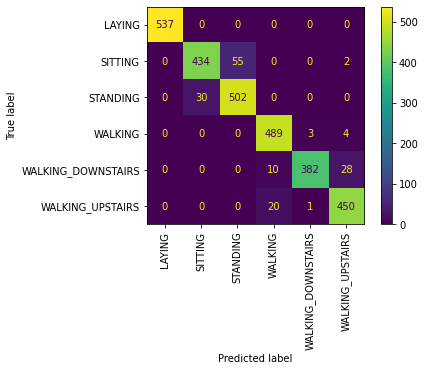

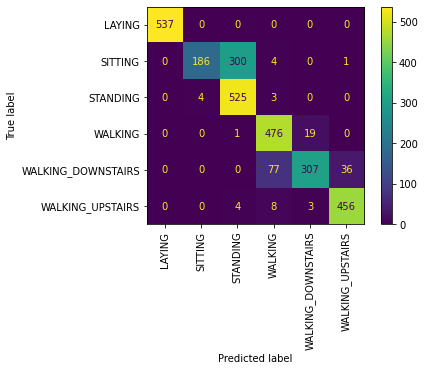

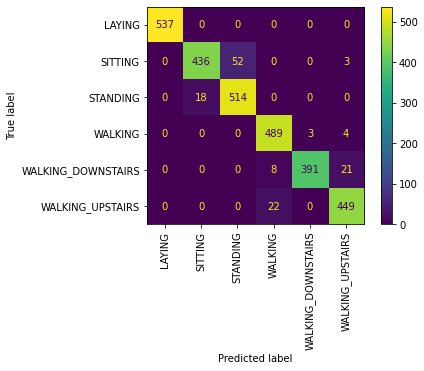

In [17]:
svc = svm.SVC(random_state=0, max_iter=1e9)
svc.fit(X_train, y_train.values.ravel())
val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val))
test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(f'SVM - Default parameters (Radial Basis Kernel) - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')


"""
SIGMOID KERNEL
"""
svc = svm.SVC(random_state=0, max_iter=1e9, kernel='sigmoid')
svc.fit(X_train, y_train.values.ravel())
val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val))
test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(f'SVM - Sigmoid Kernel - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')


"""
POLYNOMIAL KERNEL
"""
svc = svm.SVC(random_state=0, max_iter=1e9, kernel='poly')
svc.fit(X_train, y_train.values.ravel())
val_score = metrics.accuracy_score(y_val.values.ravel(), svc.predict(X_val))
test_score = metrics.accuracy_score(y_test.values.ravel(), svc.predict(X_test))
print(f'SVM - Polynomial Kernel - Validation set score: {val_score}, Test set score: {test_score}')
print(metrics.classification_report(y_test, svc.predict(X_test)))
metrics.plot_confusion_matrix(svc, X_test, y_test, values_format='g', xticks_rotation='vertical')